# **Modified Code**


In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics
import joblib
import matplotlib.pyplot as plt

## Loading Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/sample_data/tweets_combined.csv')
df

,Unnamed: 0,tweet,target
0,0,Today in Selfcare: beauty &amp; laughs Kung Fu...,0
1,1,I get to spend New Year's home again alone and...,1
2,2,"Depressed and lonely /: Stuck in a deep, never...",1
3,3,If this is your response to someone saying the...,0
4,4,Apparently you get a free pass just by mention...,0
...,...,...,...
3195,3195,"May the new year abound in H’s: Health, Hope, ...",0
3196,3196,It is not a beautiful day as usual.,1
3197,3197,Compact Metal Leaf Grinder with Four Layers p...,0
3198,3198,First Christmas in YEARS that I have to work. ...,0


In [4]:
print(df.info())
print('_'*40)
print(df.target.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3200 non-null   int64 
 1   tweet       3200 non-null   object
 2   target      3200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 75.1+ KB
None
________________________________________
target
0    2357
1     843
Name: count, dtype: int64


In [5]:
X = df['tweet']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=21)

print('Train Data Length:',len(X_train))
print('Test Data Length:',len(X_test))

Train Data Length: 2240
Test Data Length: 960


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [9]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[546, 165],
       [145, 104]])

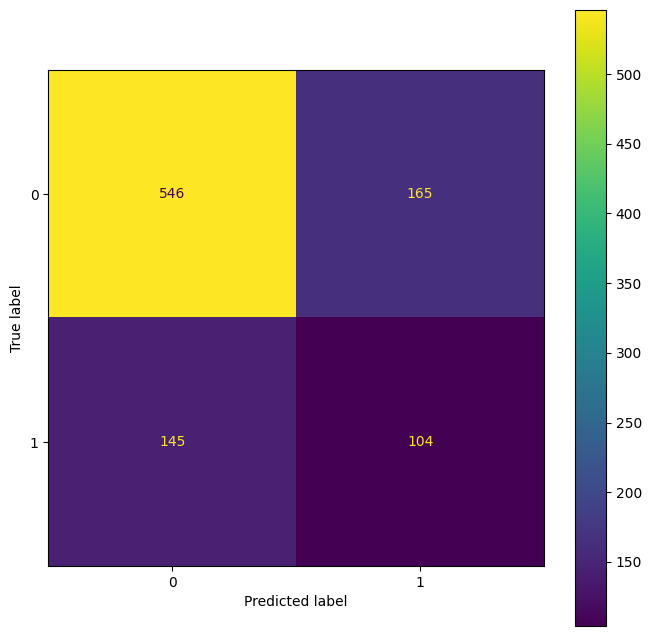

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions,average='weighted'))

Accuracy: 0.6770833333333334
Precision: 0.6854904601918452
Recall: 0.6770833333333334


In [12]:
new_val = vectorizer.transform(['Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia'])

model.predict(new_val)[0]

np.int64(0)

## Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[681,  30],
       [185,  64]])

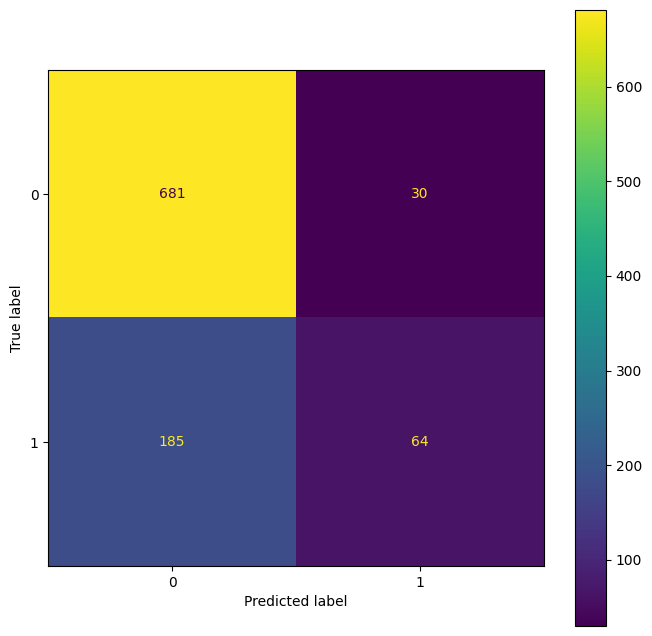

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7760416666666666
Precision: 0.759004087636971
Recall: 0.7760416666666666


## SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
model = SGDClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [20]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[621,  90],
       [126, 123]])

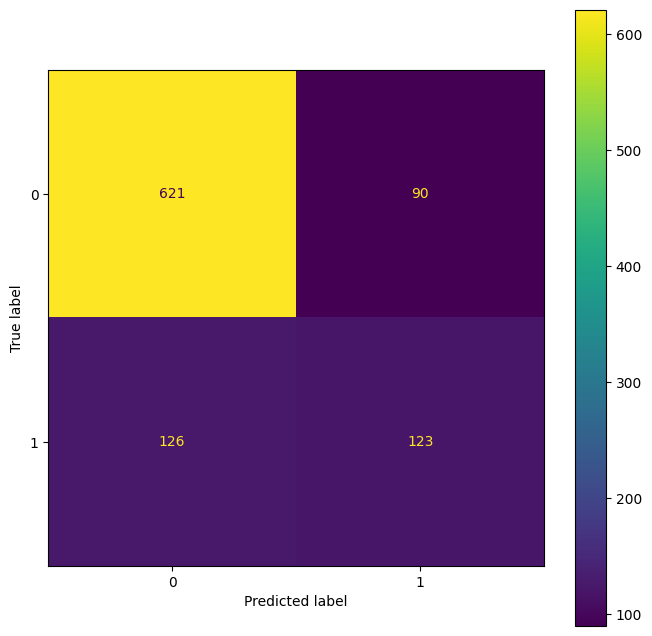

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.775
Precision: 0.7654802307822841
Recall: 0.775


## Ridge Classifier

In [23]:
from sklearn.linear_model import RidgeClassifier

In [24]:
model = RidgeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [25]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[637,  74],
       [143, 106]])

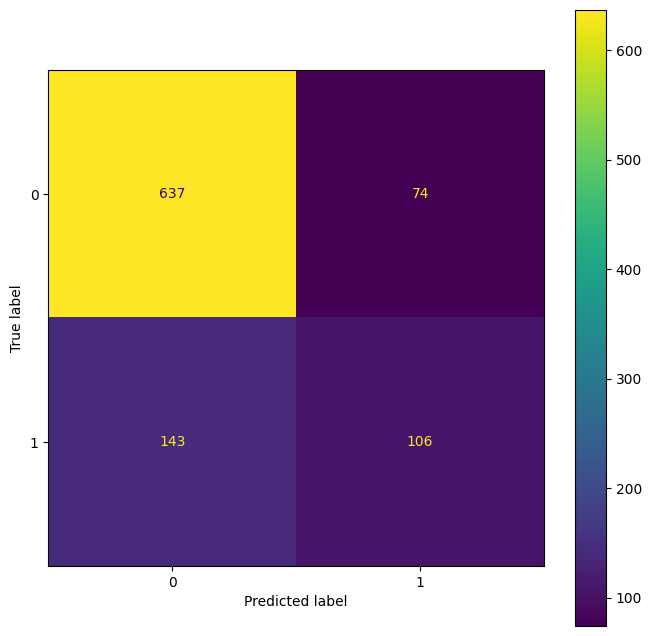

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7739583333333333
Precision: 0.7575868055555556
Recall: 0.7739583333333333


## Ridge Classifier CV
Slow

In [28]:
from sklearn.linear_model import RidgeClassifierCV

In [29]:
model = RidgeClassifierCV()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [30]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[637,  74],
       [143, 106]])

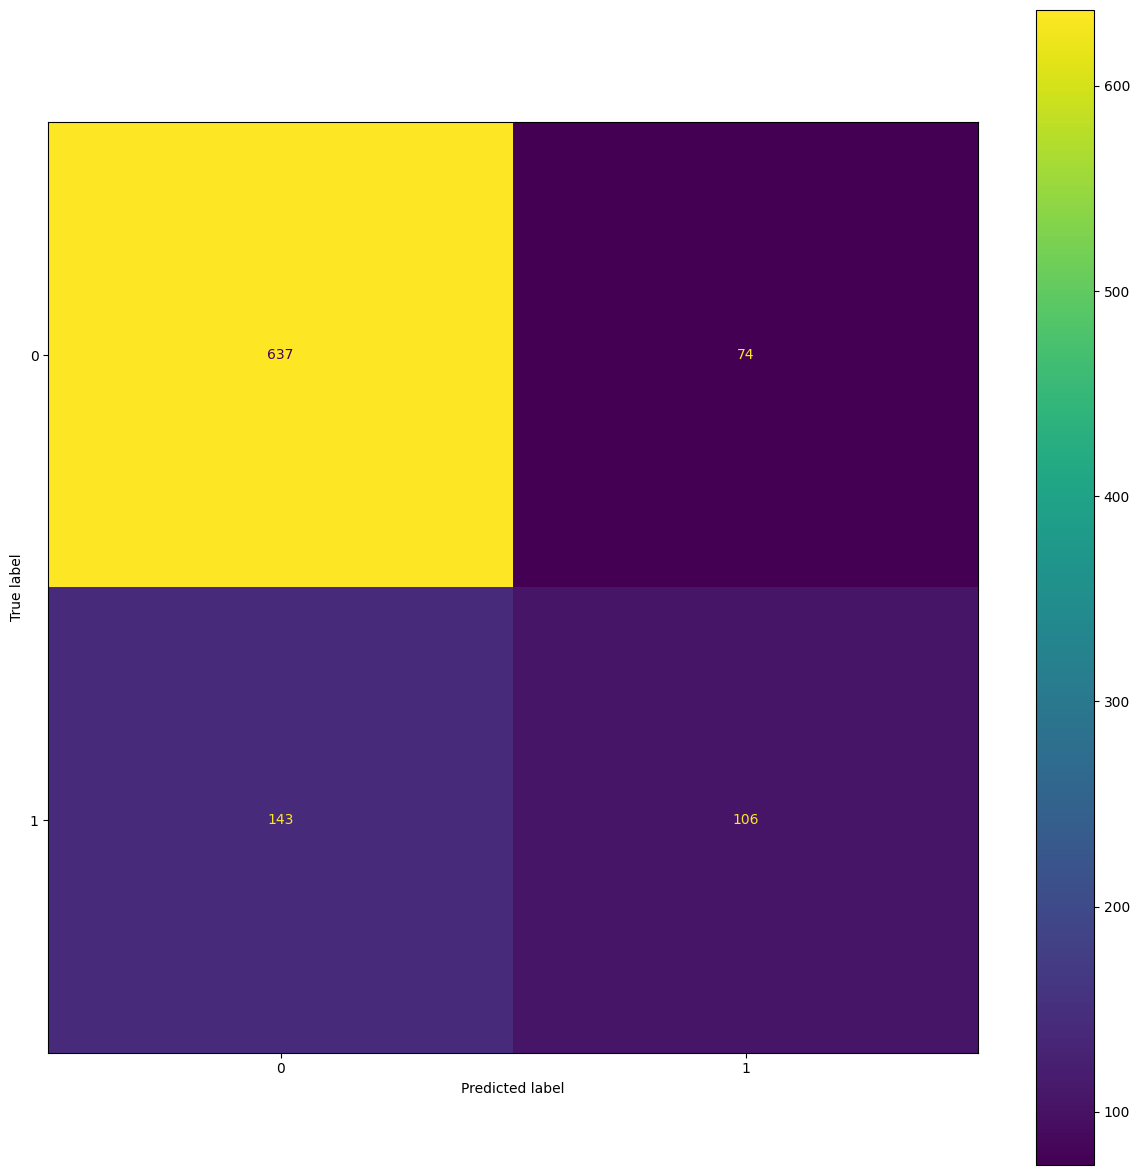

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(15,15))
cmd.plot(ax=ax)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7739583333333333
Precision: 0.7575868055555556
Recall: 0.7739583333333333


## Passive Aggressive Classifier

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [34]:
model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [35]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[550, 161],
       [110, 139]])

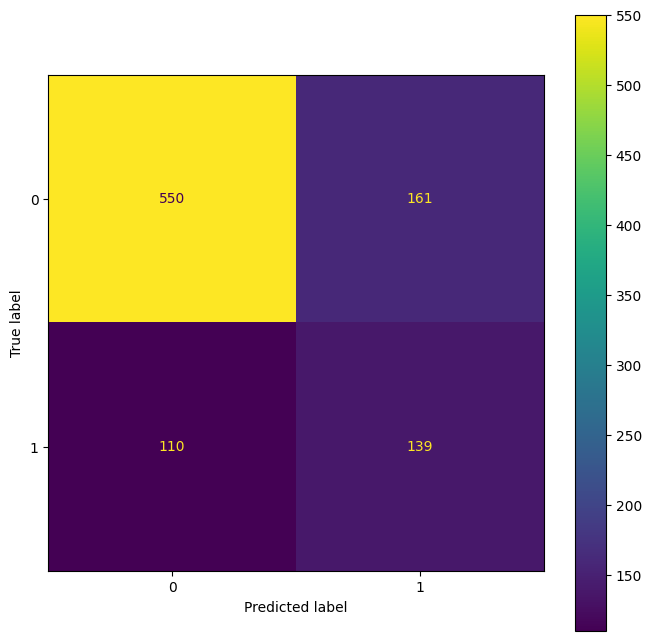

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7177083333333333
Precision: 0.7373645833333333
Recall: 0.7177083333333333


## Ada Boost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [40]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[689,  22],
       [223,  26]])

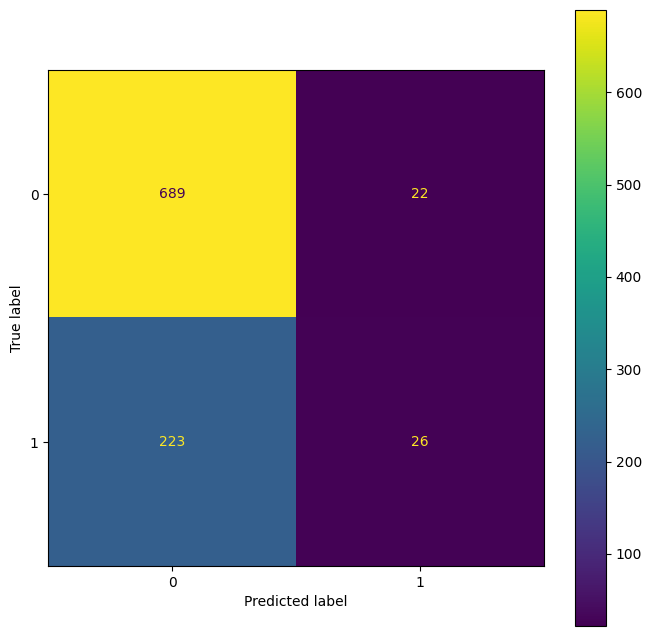

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7447916666666666
Precision: 0.7000239857456141
Recall: 0.7447916666666666


## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [45]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[685,  26],
       [208,  41]])

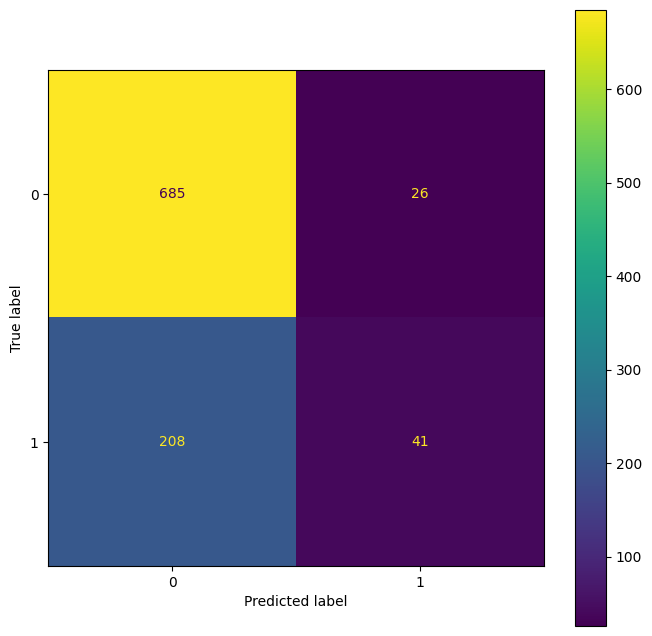

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.75625
Precision: 0.7268386162691581
Recall: 0.75625


## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [50]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[678,  33],
       [203,  46]])

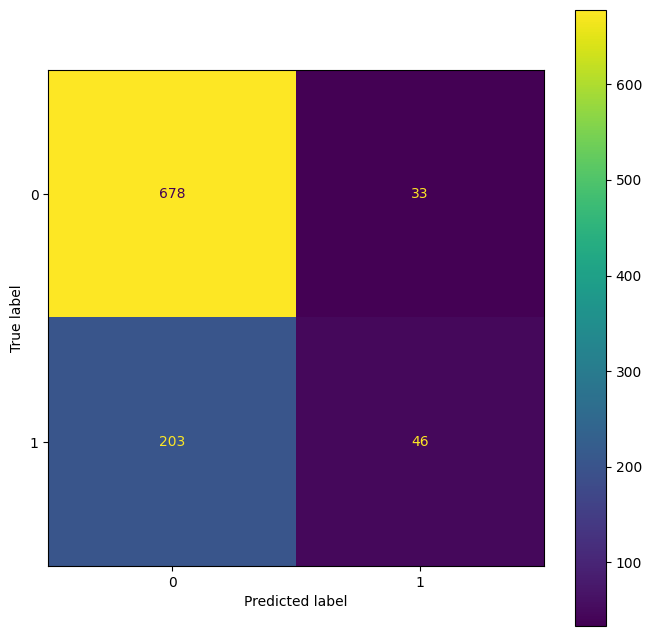

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7541666666666667
Precision: 0.7209986853259386
Recall: 0.7541666666666667


## Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [55]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[645,  66],
       [148, 101]])

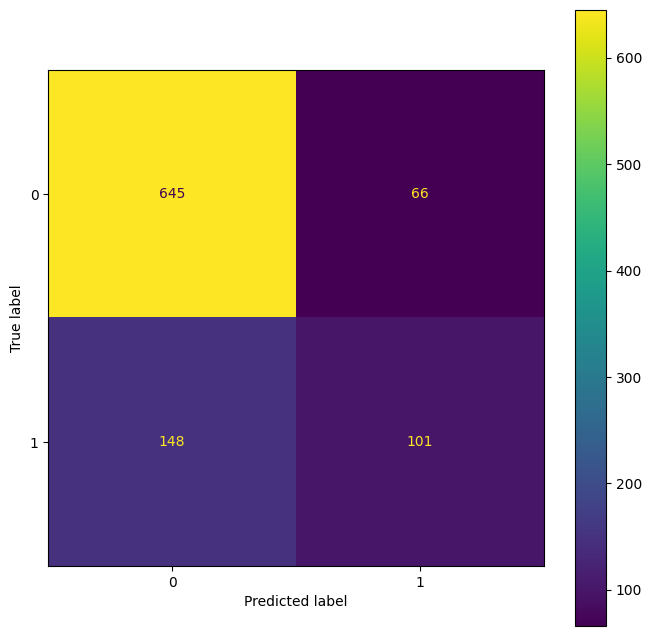

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7770833333333333
Precision: 0.7592674203925062
Recall: 0.7770833333333333


## Linear SVC Classifier

In [58]:
from sklearn.svm import LinearSVC

In [59]:
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [60]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[619,  92],
       [126, 123]])

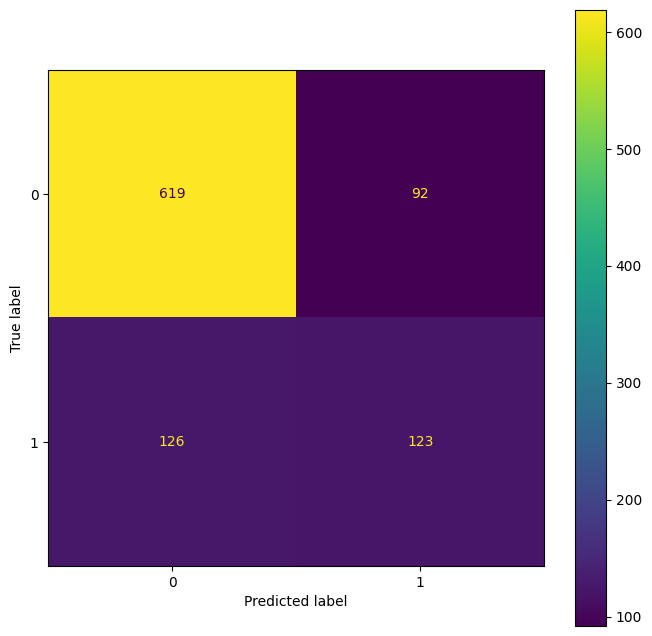

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.7729166666666667
Precision: 0.7637515607928829
Recall: 0.7729166666666667


##  Nu SVC Classifier
Slow

In [63]:
from sklearn.svm import NuSVC

In [64]:
model = NuSVC(kernel='rbf',nu=0.01)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [65]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[637,  74],
       [148, 101]])

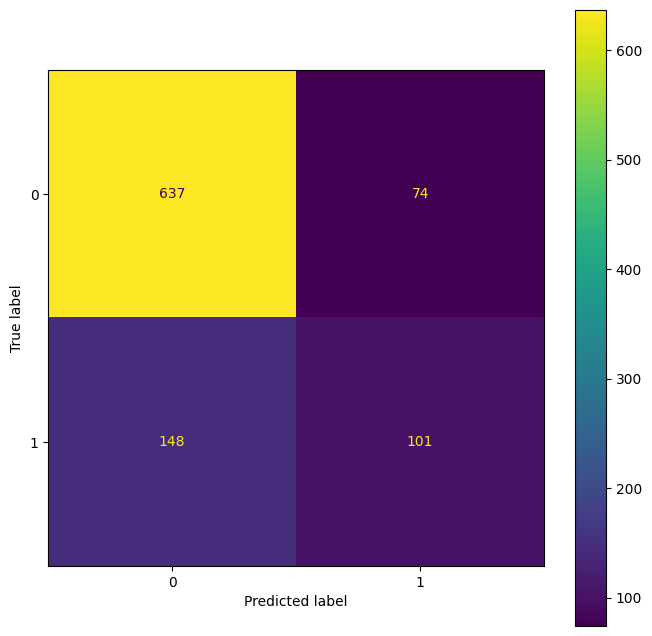

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.76875
Precision: 0.7506876706096451
Recall: 0.76875


##  Linear Discriminant Analysis Classifier

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
model = LinearDiscriminantAnalysis()
model.fit(pd.DataFrame(X_train.todense(), columns = vectorizer.get_feature_names_out()), y_train)
predictions = model.predict(X_test.toarray())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [70]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[578, 133],
       [116, 133]])

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='weighted')) # [None, 'micro', 'macro', 'weighted'].
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))

Accuracy: 0.740625
Precision: 0.7465192723342938
Recall: 0.740625


In [72]:
import joblib

# Save the best model
joblib.dump(model, 'best_anxiety_depression_model.pkl')
print("✅ Model saved as 'best_anxiety_depression_model.pkl'")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("✅ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")


✅ Model saved as 'best_anxiety_depression_model.pkl'
✅ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


# Script for Inference

In [73]:
import joblib

# Load model and vectorizer
model = joblib.load('best_anxiety_depression_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to predict mental health from text
def predict_mental_health(text):
    features = vectorizer.transform([text])
    prediction = model.predict(features)[0]
    label = 'Anxiety/Depression' if prediction == 1 else 'Normal'
    return label

In [74]:
# Example usage
if __name__ == "__main__":
    print("Mental Health Post Classifier")
    print("Type your message below to analyze:")
    user_input = input(">> ")
    result = predict_mental_health(user_input)
    print(f"\n🔎 Prediction: {result}")

Mental Health Post Classifier
Type your message below to analyze:
>> i am happy

🔎 Prediction: Normal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [75]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [76]:
import streamlit as st
import joblib

# Load the saved model and vectorizer
model = joblib.load("best_anxiety_depression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Streamlit UI
st.set_page_config(page_title="Mental Health Classifier", layout="centered")

st.title("🧠 Mental Health Post Classifier")
st.write("This app predicts whether a social media post shows signs of **anxiety/depression**.")

# Input text
user_input = st.text_area("✍️ Enter your post or message here:")

# When the button is clicked
if st.button("🔍 Predict"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        features = vectorizer.transform([user_input])
        prediction = model.predict(features)[0]
        result = "Anxiety/Depression 😟" if prediction == 1 else "Normal 😊"
        st.success(f"**Prediction:** {result}")


2025-06-11 16:12:56.344 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.347 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.776 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-11 16:12:56.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.780 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [77]:
import streamlit as st
import joblib

# Load the saved model and vectorizer
model = joblib.load("best_anxiety_depression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Streamlit UI
st.set_page_config(page_title="Mental Health Classifier", layout="centered")

st.markdown("<h1 style='white-space: nowrap;'>🧠 Anxiety and Depression Detection</h1>", unsafe_allow_html=True)
st.markdown("#### _Your AI-powered mental health assistant_")
st.write("This app predicts whether a social media post shows signs of **anxiety/depression**.")

# Input text
user_input = st.text_area("✍️ Enter your post or message here:")

# When the button is clicked
if st.button("🔍 Predict"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        features = vectorizer.transform([user_input])
        prediction = model.predict(features)[0]
        result = "Anxiety/Depression 😟" if prediction == 1 else "Normal 😊"
        st.success(f"**Prediction:** {result}")




2025-06-11 16:12:56.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.845 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 16:12:56.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [78]:
# Streamlit app code as a string
streamlit_code = '''
import streamlit as st
import joblib

# Load the saved model and vectorizer
model = joblib.load("best_anxiety_depression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Streamlit UI
st.set_page_config(page_title="Mental Health Classifier", layout="centered")

st.markdown("<h1 style='white-space: nowrap;'>🧠 Anxiety and Depression Detection</h1>", unsafe_allow_html=True)
st.markdown("#### _Your AI-powered mental health assistant_")
st.write("This app predicts whether a social media post shows signs of **anxiety/depression**.")

# Input text
user_input = st.text_area("✍️ Enter your post or message here:")

# When the button is clicked
if st.button("🔍 Predict"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        features = vectorizer.transform([user_input])
        prediction = model.predict(features)[0]
        result = "Anxiety/Depression 😟" if prediction == 1 else "Normal 😊"
        st.success(f"**Prediction:** {result}")

'''

# Saving as a file in Colab
with open("app.py", "w") as file:
    file.write(streamlit_code)

print("✅ app.py file created.")


✅ app.py file created.


In [79]:
from google.colab import files
files.download("app.py")

files.download('best_anxiety_depression_model.pkl')
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>